In [10]:
from dotenv import load_dotenv
load_dotenv()
import os
from PIL import Image

In [11]:
google_api_key = os.getenv('GOOGLE_API_KEY')
if not google_api_key: 
    raise ValueError("GOOGLE_API_KEY is not set in the environment variables.")

In [12]:
prompt = "Provide an example recipe for the baked goods in the image. "

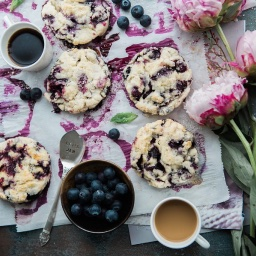

In [13]:
img = Image.open('baked_goods_1.jpg')
# img = Image.open('baked_goods_2.jpg')
# img = Image.open('baked_goods_3.jpg')
img

In [15]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import Markdown, clear_output, display
import base64, io

In [16]:
def image_url(img):
    buffered = io.BytesIO()
    img.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return f"data:image/jpeg;base64,{img_str}"

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
message = HumanMessage(content=[
    {'type': 'text', 'text': prompt},
    {'type': 'image_url', 'image_url': image_url(img)},
])
response = model.stream([message])
buffer = []
for chunk in response:
    buffer.append(chunk.content)
    clear_output()
    display(Markdown(''.join(buffer)))

Certainly! Based on the image, the baked goods appear to be Blueberry Scones. Here's a recipe for a simple yet delicious version:

**Recipe: Buttery Blueberry Scones**

**Yields:** 8-10 scones
**Prep Time:** 15 minutes
**Cook Time:** 20-25 minutes

**Ingredients:**

*   2 cups all-purpose flour, plus more for dusting
*   1/4 cup granulated sugar
*   1 tablespoon baking powder
*   1/2 teaspoon baking soda
*   1/4 teaspoon salt
*   1/2 cup (1 stick) cold unsalted butter, cut into cubes
*   3/4 cup buttermilk, cold
*   1 teaspoon vanilla extract
*   1 1/2 cups fresh blueberries, gently rinsed and dried

**For the topping (optional):**

*   1 tablespoon milk or cream
*   1 tablespoon granulated sugar (for sprinkling)

**Equipment:**

*   Large mixing bowl
*   Pastry blender or fork
*   Measuring cups and spoons
*   Baking sheet
*   Parchment paper or silicone baking mat

**Instructions**

**Get Started:**

1.  Preheat your oven to 400°F (200°C). Line a baking sheet with parchment paper or a silicone baking mat.

**Combine Dry Ingredients:**

1.  In a large mixing bowl, whisk together the flour, sugar, baking powder, baking soda, and salt.

**Cut in the Butter:**

1.  Add the cold, cubed butter to the flour mixture. Use a pastry blender or your fingertips to cut the butter into the flour until the mixture resembles coarse crumbs.  You want to see small pieces of butter still visible.

**Add Wet Ingredients:**

1.  In a separate small bowl, whisk together the cold buttermilk and vanilla extract.
2.  Pour the buttermilk mixture into the flour mixture. Stir gently with a fork or spatula until just combined. Be careful not to overmix.

**Fold in Blueberries:**

1.  Gently fold in the blueberries. Again, be careful not to overmix.

**Shape and Bake:**

1.  Turn the dough out onto a lightly floured surface. Gently pat the dough into a circle about 1 inch thick.
2.  Use a sharp knife or a biscuit cutter to cut the circle into 8-10 wedges or rounds.
3.  Place the scones onto the prepared baking sheet, leaving a little space between them.

**Add Topping (optional):**

1.  Brush the tops of the scones with milk or cream. Sprinkle with granulated sugar.

**Bake:**

1.  Bake in the preheated oven for 20-25 minutes, or until the scones are golden brown.

**Cool and Enjoy:**

1.  Remove the scones from the oven and let them cool on the baking sheet for a few minutes before transferring them to a wire rack to cool completely.
2.  Serve warm or at room temperature. They are delicious with butter, jam, or clotted cream.

**Tips and Notes:**

*   **Cold Ingredients:** Using cold butter and buttermilk is crucial for creating flaky scones.
*   **Don't Overmix:** Overmixing the dough will result in tough scones. Mix until just combined.
*   **Fresh Blueberries:** Fresh blueberries are recommended for the best flavor and texture. If using frozen, do not thaw them before adding them to the dough.
*   **Variations:** Feel free to add lemon zest, almond extract, or other flavorings to the dough.

Enjoy your homemade Blueberry Scones!
